<a href="https://colab.research.google.com/github/saurabhshinkar/Sbsdp/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# **Importing** **Libraries**

In [1]:
#Import all library that will be used in entire project
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# **Mount Drive And Import Data**

In [2]:
#Mount google drive for access of the play store dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importing Dataset
File_path='/content/drive/MyDrive/Capstone Projects/Seoul bike sharing demand prediction/'
data= pd.read_csv(File_path + 'SeoulBikeData.csv',encoding= 'unicode_escape')

In [4]:
# First Look 
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
#tail of data
data.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [7]:
#Discription of Data
data.describe(include='all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


# **Handling Missing Vaules**

In [8]:
data.isnull().any()

Date                         False
Rented Bike Count            False
Hour                         False
Temperature(°C)              False
Humidity(%)                  False
Wind speed (m/s)             False
Visibility (10m)             False
Dew point temperature(°C)    False
Solar Radiation (MJ/m2)      False
Rainfall(mm)                 False
Snowfall (cm)                False
Seasons                      False
Holiday                      False
Functioning Day              False
dtype: bool

No null values in our data

# **Making Data In Proper Format**

In [9]:
type(data['Date'][0])

str

In [10]:
data['Date'] = pd.to_datetime(data['Date'])

In [11]:
type(data['Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [12]:
import datetime

In [13]:
data['year'] = pd.DatetimeIndex(data['Date']).year
data['month'] = pd.DatetimeIndex(data['Date']).month_name()
data['day'] = pd.DatetimeIndex(data['Date']).day_name()

In [14]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,year,month,day
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,January,Thursday
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,January,Thursday
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,January,Thursday
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,January,Thursday
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,January,Thursday


In [25]:
data.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,year,month,day
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,November,Friday
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,November,Friday
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,November,Friday
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,November,Friday
8759,2018-11-30,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,November,Friday


Text(0.5, 1.0, 'Correlation Heatmap')

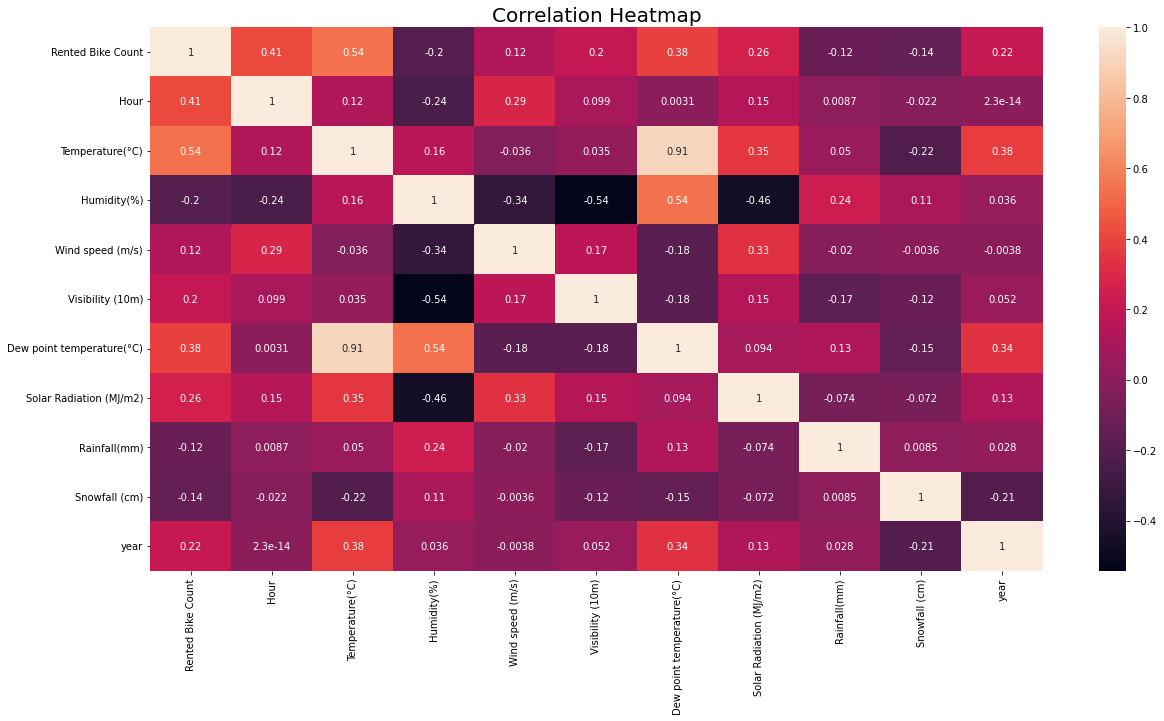

In [15]:
#Correlation Heatmap
plt.figure(figsize = (20,10))
sns.heatmap(data.corr(), annot= True)
plt.title("Correlation Heatmap",fontsize=20)

In [16]:
# find categorical variables
categorical = [var for var in data.columns if data[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 5 categorical variables


In [17]:
# find Numerical variables
numerical = [var for var in data.columns if data[var].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 12 numerical variables


In [18]:
numerical 

['Date',
 'Rented Bike Count',
 'Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'year']

In [19]:
numerical.remove('Date')

In [20]:
numerical

['Rented Bike Count',
 'Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'year']

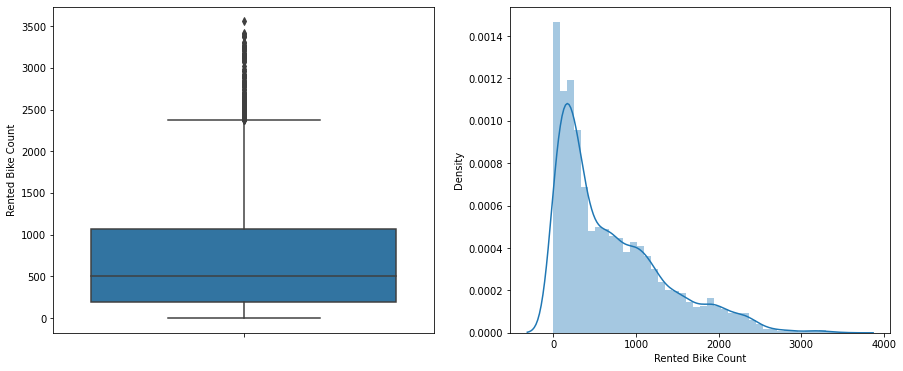

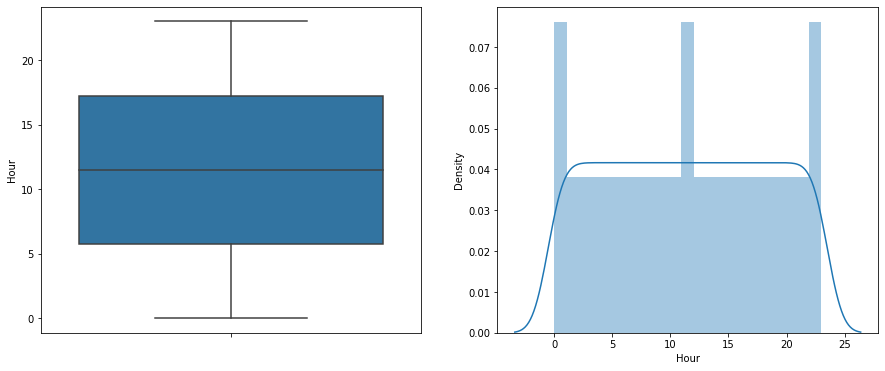

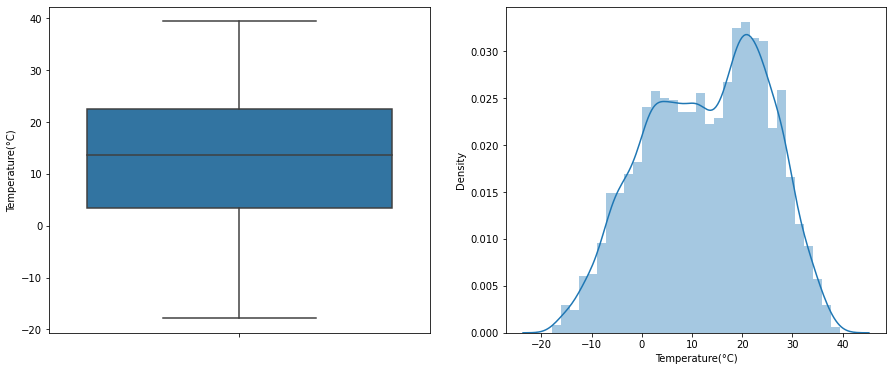

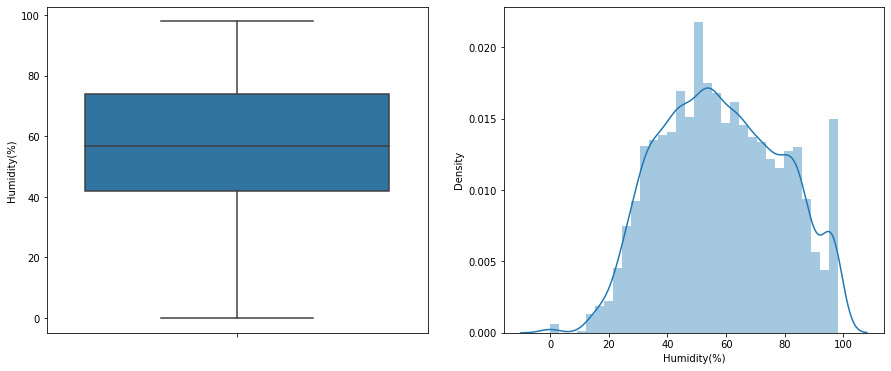

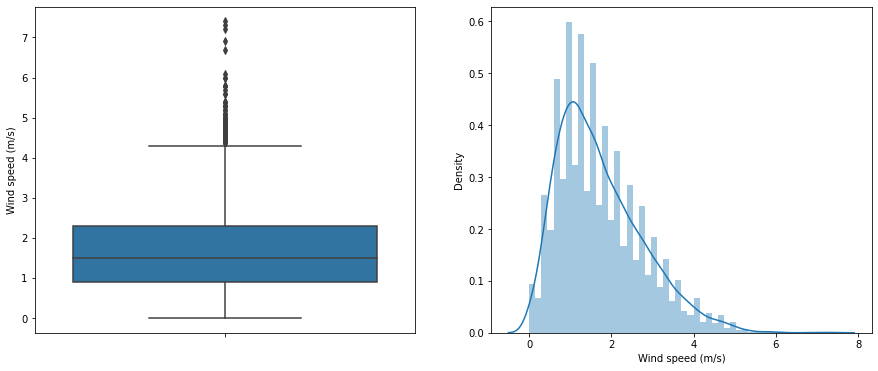

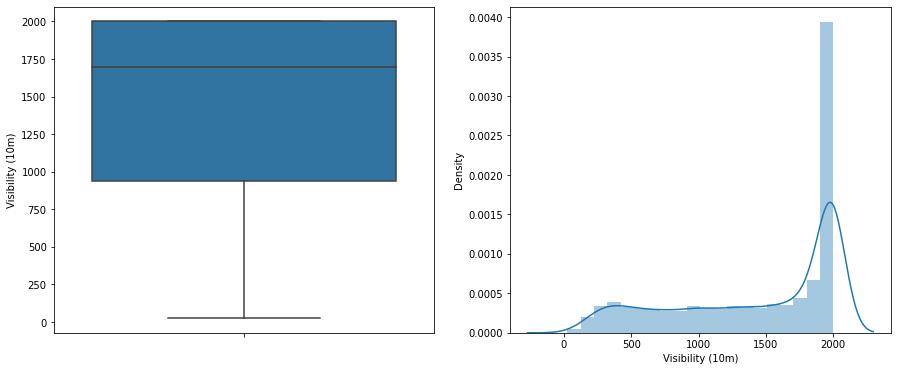

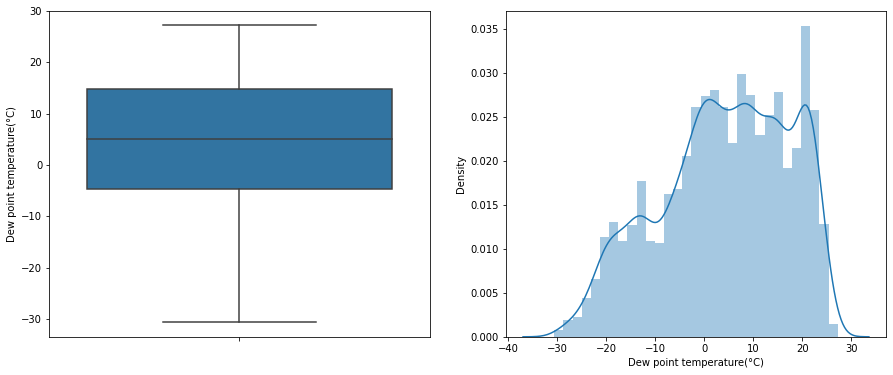

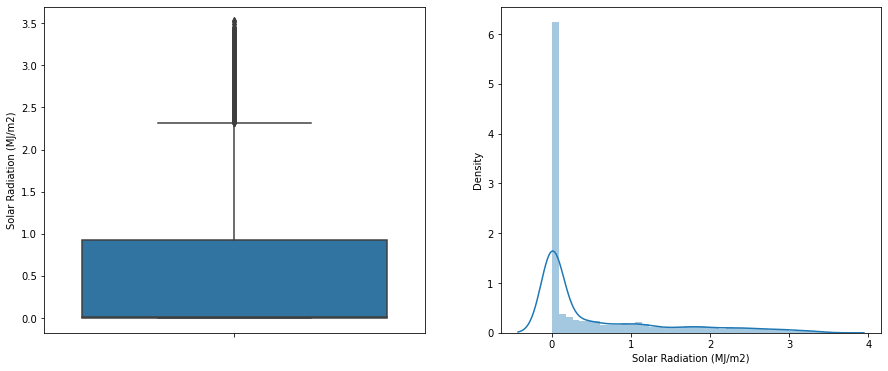

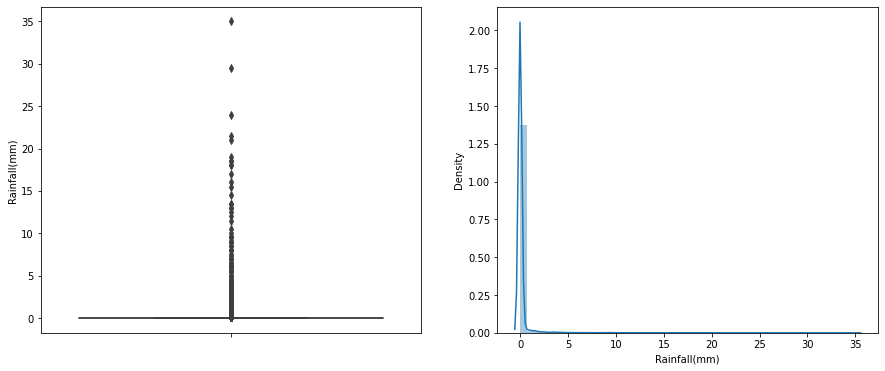

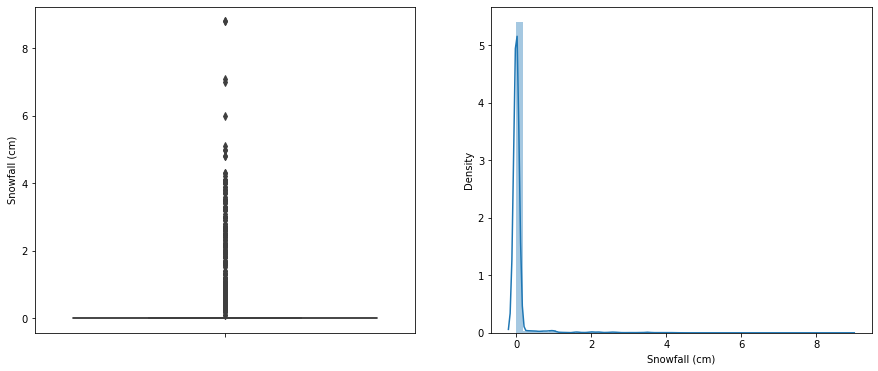

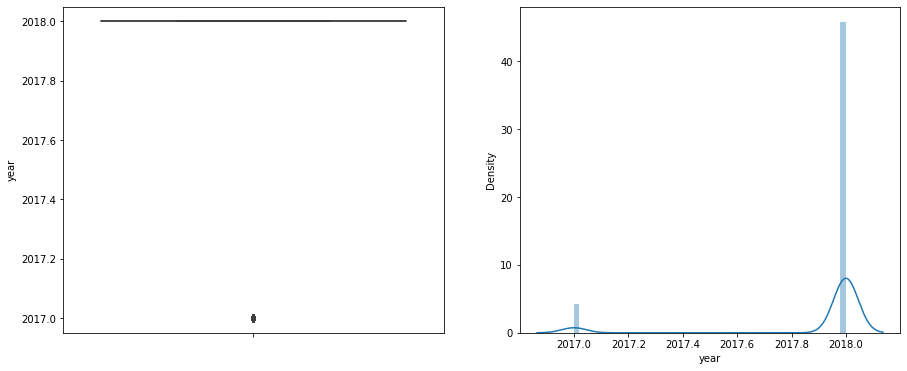

In [21]:
for var in numerical:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=data[var])
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(data[var].dropna())
    fig.set_xlabel(var)

    plt.show()

# **EDA**

In [22]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,year,month,day
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,January,Thursday
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,January,Thursday
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,January,Thursday
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,January,Thursday
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,January,Thursday


In [30]:
# Number of labels: cardinality
#Let's now check if our categorical variables have a huge number of categories. 
#This may be a problem for some machine learning models.
for var in categorical:
    print(var, ' contains ', len(data[var].unique()), ' labels')

Seasons  contains  4  labels
Holiday  contains  2  labels
Functioning Day  contains  2  labels
month  contains  12  labels
day  contains  7  labels


In [31]:
# Encode Categorical Variables - one hot encoding
from sklearn.preprocessing import OneHotEncoder 
onehotencoder = OneHotEncoder() 

# ***Final Df***

In [120]:
# Encode Categorical Variables - one hot encoding
from sklearn.preprocessing import OneHotEncoder

#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on 'team' column 
encoder_df = pd.DataFrame(encoder.fit_transform(data[['Seasons','Holiday','Functioning Day','year','month','day']]).toarray())

encoder_df.columns = encoder.get_feature_names(['Seasons','Holiday','Functioning Day','year','month','day'])

#merge one-hot encoded columns back with original DataFrame
final_df = data.join(encoder_df)


In [ ]:
final_df

In [ ]:

# Target Variable Transformation
sns.distplot(final_df['Rented Bike Count'], fit=norm);
fig = plt.figure()

In [ ]:
# It looks more normal now.
sns.distplot(np.sqrt(final_df['Rented Bike Count']), fit=norm);
fig = plt.figure()

In [ ]:
final_df.columns

In [66]:
final_df.head(1)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),...,month_November,month_October,month_September,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [123]:
Y =np.sqrt(final_df['Rented Bike Count'])

In [124]:
final_df.drop(columns=['Rented Bike Count','Date','year','month','day'], axis=1,inplace=True)

In [125]:
final_df.drop(columns=['Seasons','Holiday','Functioning Day'], axis=1,inplace=True)

In [71]:
final_df.columns

Index(['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)',
       'Seasons_Autumn', 'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter',
       'Holiday_Holiday', 'Holiday_No Holiday', 'Functioning Day_No',
       'Functioning Day_Yes', 'year_2017', 'year_2018', 'month_April',
       'month_August', 'month_December', 'month_February', 'month_January',
       'month_July', 'month_June', 'month_March', 'month_May',
       'month_November', 'month_October', 'month_September', 'day_Friday',
       'day_Monday', 'day_Saturday', 'day_Sunday', 'day_Thursday',
       'day_Tuesday', 'day_Wednesday'],
      dtype='object')

In [126]:
X=final_df

In [46]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


In [73]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [74]:
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [75]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [76]:
regressor.intercept_

1.6360011607927483

In [77]:
regressor.coef_

array([ 1.11029637e+01,  4.74860507e+00, -2.71631613e+01,  7.26282228e-01,
        1.12946983e+00,  2.65912213e+01, -2.78560084e+00, -4.94728413e+01,
        1.41205265e+00,  3.29874258e+00,  9.96845597e-01, -4.71084366e-02,
       -4.24847974e+00, -1.43419221e+00,  1.43419221e+00, -1.41839399e+01,
        1.41839399e+01,  1.21140747e+00, -1.21140747e+00, -3.88060181e-01,
       -1.80414561e+00, -6.07258761e-01, -8.06373032e-01, -1.91523680e-01,
       -9.18888369e-01,  3.56682633e+00, -5.30092938e-01,  5.42703319e-01,
        9.09584269e-02,  1.56102927e+00, -5.15174773e-01,  5.82054374e-01,
        2.91904312e-01,  5.49334700e-02, -1.03631942e+00, -2.06086378e-02,
       -1.06948465e-01,  2.34984370e-01])

In [99]:
regressor.score(X_train, y_train)

0.6681203578521732

In [78]:
y_pred_train = regressor.predict(X_train)

In [79]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [81]:
y_pred 

array([19.43421982, 25.06880994, 21.89039026, ..., 13.9101311 ,
       34.75064497, 22.74154705])

In [80]:
# Actual profits on test data
y_test

4059    17.888544
6914    24.083189
233     15.033296
982     12.845233
5967    25.416530
          ...    
3152     0.000000
5867    23.388031
3456    14.594520
7750    36.482873
7728    27.982137
Name: Rented Bike Count, Length: 1752, dtype: float64

In [82]:
mean_squared_error(y_test, y_pred)

53.32974930532968

In [84]:
from numpy import math

In [85]:
math.sqrt(mean_squared_error(y_train, y_pred_train))

7.156816437346343

In [100]:
r2_score(y_train, y_pred_train)

0.6681203578521732

In [101]:
r2_score(y_test, y_pred)

0.6613688695055839

In [91]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)

lasso.fit(X_train, y_train)

Lasso(alpha=0.0001, max_iter=3000)

In [92]:
lasso.score(X_train, y_train)

0.6681201912017811

In [103]:
from sklearn.model_selection import GridSearchCV

In [104]:
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [105]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -51.76948281487702


In [106]:
y_pred_ridge = ridge_regressor.predict(X_test)

In [107]:
MSE  = mean_squared_error(y_test, y_pred_ridge)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test, y_pred_ridge)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 53.33012417981637
RMSE : 7.302747714375485
R2 : 0.6613664891424118
Adjusted R2 :  0.6538544789774449


In [108]:
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [109]:
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [110]:
elasticnet.score(X_train, y_train)

0.545620870979157

In [111]:
y_pred_en = elasticnet.predict(X_test)

In [112]:
MSE  = mean_squared_error((y_test), (y_pred_en))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_en))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test),(y_pred_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 74.13925663829396
RMSE : 8.610415590335577
R2 : 0.5292334838159066
Adjusted R2 :  0.5187903270062186


In [130]:
from sklearn.metrics import accuracy_score, auc
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=324)

In [161]:
TreeRegressor= DecisionTreeRegressor(criterion='mse', random_state=0)
TreeRegressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', random_state=0)

In [162]:
train_preds_tree=  TreeRegressor.predict(X_train)
test_preds_tree = TreeRegressor.predict(X_test)

In [164]:
R2_Score1 = r2_score(y_train, train_preds_tree)

In [165]:
R2_Score2 = r2_score(y_test, test_preds_tree)

In [166]:
R2_Score1

1.0

In [167]:
R2_Score2 

0.8346266024725618

In [131]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score

In [168]:

# Splitting the dataset into the Training set and Test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

# Hyperparameter tuning
Regressor = RandomForestRegressor() # For GBM, use GradientBoostingClassifier()
grid_values = {'n_estimators':[50, 80,  100], 'max_depth':[3, 5, 7]}
Regressor = GridSearchCV(Regressor, param_grid = grid_values, scoring = 'roc_auc', cv=5)

# Fit the object to train dataset
Regressor.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 5, 7], 'n_estimators': [50, 80, 100]},
             scoring='roc_auc')

In [175]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

# Hyperparameter tuning
Regressor = RandomForestRegressor() # For GBM, use GradientBoostingClassifier()

# Fit the object to train dataset
Regressor.fit(X_train, Y_train)

RandomForestRegressor()

In [176]:
train_preds =  Regressor.predict(X_train)
test_preds  = Regressor.predict(X_test)

In [177]:
y_pred = Regressor.predict(X_test)

In [179]:
R2_Score1 = r2_score(Y_train, train_preds)

In [181]:
R2_Score2 = r2_score(Y_test, test_preds)

In [180]:
R2_Score1

0.9888510998097038

In [182]:
R2_Score2 

0.9165787218526185

In [183]:
features = X_train.columns
importances = Regressor.feature_importances_
indices = np.argsort(importances)

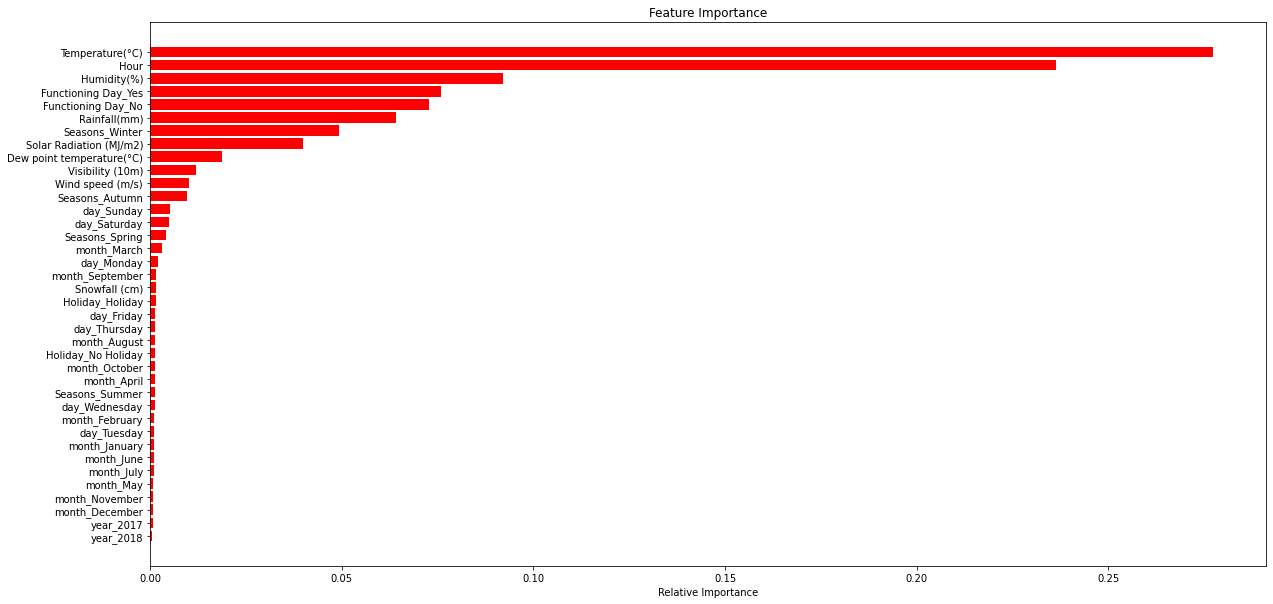

In [186]:
plt.figure(figsize=(20,10))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

In [187]:
features = X_train.columns
importances = TreeRegressor.feature_importances_
indices = np.argsort(importances)

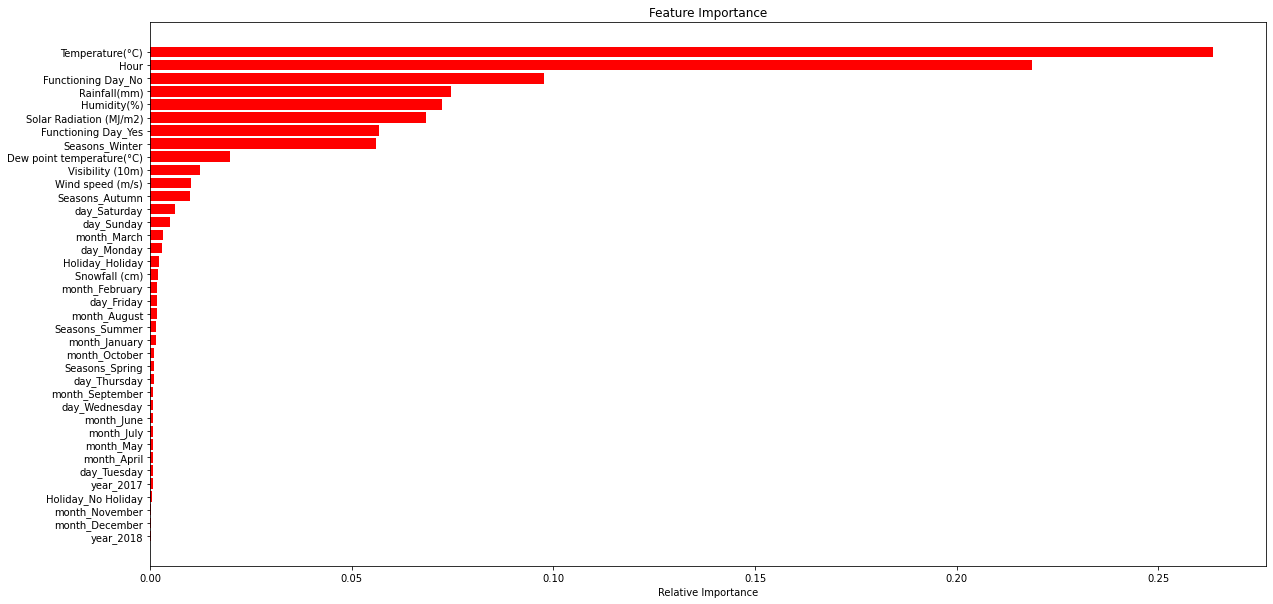

In [188]:
plt.figure(figsize=(20,10))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

In [190]:

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
#

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
#
# Standardize the dataset
#
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
#
# Hyperparameters for GradientBoostingRegressor
#
gbr_params = {'n_estimators': 1000,
          'max_depth': 3,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}
#
# Create an instance of gradient boosting regressor
#
gbr = GradientBoostingRegressor(**gbr_params)
#
# Fit the model
#
gbr.fit(X_train_std, y_train)
#
# Print Coefficient of determination R^2
#
print("Model Accuracy: %.3f" % gbr.score(X_test_std, y_test))
#
# Create the mean squared error
#
mse = mean_squared_error(y_test, gbr.predict(X_test_std))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

Model Accuracy: 0.879
The mean squared error (MSE) on test set: 19.0957


In [191]:
# Necessary imports
import numpy as np
import pandas as pd
import xgboost as xg
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
 

 
# Splitting
train_X, test_X, train_y, test_y = train_test_split(X, Y,
                      test_size = 0.3, random_state = 123)
 
# Instantiation
xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)
 
# Fitting the model
xgb_r.fit(train_X, train_y)
 
# Predict the model
pred = xgb_r.predict(test_X)
 
# RMSE Computation
rmse = np.sqrt(MSE(test_y, pred))
print("RMSE : % f" %(rmse))

[13:33:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE :  11.222066


In [192]:
print("Model Accuracy: %.3f" % xgb_r.score(X_test_std, y_test))

ValueError: ignored